# Exercise 18

## Analyze class homeworks


In [82]:
import pandas as pd
import numpy as np
from textblob import TextBlob
%matplotlib inline
import matplotlib.pyplot as plt
import textdistance
from wordcloud import WordCloud

In [83]:
data = pd.read_excel('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

tabla con: conteo de caracteres, conteo de palabras, palabra mas usada, sustantivos utilizados. palabras con mayusculas, palabras con minusculas. 

In [84]:
# check for null values
data.isnull().sum()

Sexo     0
T1       1
T2      12
T3      12
T4       6
T5       7
T6      13
dtype: int64

In [85]:
# fill na with 'unknown'
data.fillna('unknown', inplace=True)

In [86]:
def add_features(serie):
    data['characters_'+serie] = data[serie].apply(len)
    data['capitals_'+serie] = data[serie].apply(lambda x: sum(1 for i in x if i.isupper()))
    data['num_words_'+serie] = data[serie].str.count('\S+')
    data['num_unique_words_'+serie] = data[serie].apply(lambda x: len(set(i for i in x.split())))


characters_ = []
capitals_ = []
num_words_ = []
num_unique_words_ = []

columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

for col in columns:
    add_features(col)
    characters_.append('characters_'+col)
    capitals_.append('capitals_'+col)
    num_words_.append('num_words_'+col)
    num_unique_words_.append('num_unique_words_'+col)
    
# calculating mean
data['mean_characters'] = data[characters_].mean(axis=1).round(2)
data['mean_capitals'] = data[capitals_].mean(axis=1).round(2)
data['mean_num_words'] = data[num_words_].mean(axis=1).round(2)
data['mean_num_unique_words'] = data[num_unique_words_].mean(axis=1).round(2)

to_keep = ['mean_characters', 'mean_capitals', 'mean_num_words', 'mean_num_unique_words']
patterns = data[to_keep]

In [87]:
patterns.head()

,mean_characters,mean_capitals,mean_num_words,mean_num_unique_words
0,1931.33,32.33,307.83,158.83
1,1420.00,26.67,220.00,129.83
2,1850.33,22.00,295.33,162.33
3,1598.83,14.50,244.67,146.17
4,1706.83,24.67,278.33,152.33


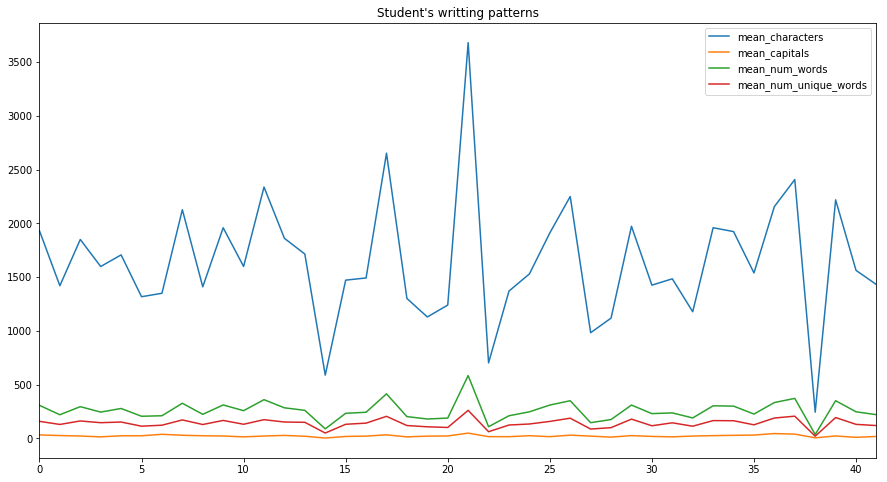

In [88]:
patterns.plot(kind='line', figsize=(15,8), title="Student's writting patterns")
plt.show()

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [37]:
def similarity(column):
    #Comparing two strings, and considering blanks to be "junk"
    results = [round((textdistance.hamming.normalized_similarity(i, j)),2) for i in data[column] for j in data[column]]
    #Convert the result to a Pandas Dataframe
    results = pd.DataFrame(np.array(results).reshape(data.shape[0],data.shape[0]), index=data.index, columns=data.index)    
    return results

In [38]:
similarity('T1')

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.00,0.04,0.07,0.06,0.05,0.08,0.07,0.03,0.06,0.06,...,0.05,0.07,0.07,0.07,0.07,0.06,0.04,0.07,0.06,0.04
1,0.04,1.00,0.06,0.07,0.06,0.06,0.05,0.02,0.06,0.05,...,0.07,0.05,0.06,0.05,0.06,0.04,0.08,0.06,0.06,0.09
2,0.07,0.06,1.00,0.07,0.08,0.06,0.07,0.04,0.06,0.06,...,0.06,0.07,0.06,0.06,0.07,0.06,0.04,0.07,0.07,0.04
3,0.06,0.07,0.07,1.00,0.06,0.06,0.08,0.04,0.08,0.07,...,0.07,0.07,0.07,0.06,0.07,0.06,0.06,0.08,0.07,0.05
4,0.05,0.06,0.08,0.06,1.00,0.06,0.09,0.04,0.08,0.07,...,0.07,0.07,0.08,0.05,0.06,0.06,0.06,0.07,0.07,0.04
5,0.08,0.06,0.06,0.06,0.06,1.00,0.07,0.03,0.06,0.06,...,0.07,0.06,0.07,0.06,0.06,0.06,0.04,0.06,0.06,0.04
6,0.07,0.05,0.07,0.08,0.09,0.07,1.00,0.03,0.07,0.07,...,0.06,0.08,0.08,0.06,0.07,0.06,0.04,0.08,0.07,0.05
7,0.03,0.02,0.04,0.04,0.04,0.03,0.03,1.00,0.03,0.03,...,0.03,0.03,0.04,0.04,0.03,0.04,0.02,0.03,0.03,0.02
8,0.06,0.06,0.06,0.08,0.08,0.06,0.07,0.03,1.00,0.07,...,0.08,0.07,0.07,0.05,0.08,0.05,0.06,0.07,0.07,0.06
9,0.06,0.05,0.06,0.07,0.07,0.06,0.07,0.03,0.07,1.00,...,0.07,0.07,0.08,0.06,0.09,0.06,0.04,0.07,0.07,0.05


In [39]:
similarity('T2')

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,...,1.0,1.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00
1,0.0,1.00,0.07,0.07,0.07,0.0,0.06,0.04,0.07,0.07,...,0.0,0.0,0.06,0.05,0.06,0.04,0.0,0.04,0.05,0.06
2,0.0,0.07,1.00,0.07,0.07,0.0,0.07,0.05,0.06,0.08,...,0.0,0.0,0.08,0.05,0.07,0.06,0.0,0.06,0.06,0.05
3,0.0,0.07,0.07,1.00,0.07,0.0,0.06,0.04,0.06,0.08,...,0.0,0.0,0.07,0.05,0.06,0.05,0.0,0.06,0.06,0.06
4,0.0,0.07,0.07,0.07,1.00,0.0,0.07,0.06,0.06,0.07,...,0.0,0.0,0.07,0.05,0.07,0.06,0.0,0.08,0.07,0.06
5,1.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,...,1.0,1.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00
6,0.0,0.06,0.07,0.06,0.07,0.0,1.00,0.05,0.05,0.07,...,0.0,0.0,0.07,0.05,0.06,0.05,0.0,0.06,0.06,0.06
7,0.0,0.04,0.05,0.04,0.06,0.0,0.05,1.00,0.04,0.05,...,0.0,0.0,0.05,0.07,0.06,0.07,0.0,0.05,0.06,0.06
8,0.0,0.07,0.06,0.06,0.06,0.0,0.05,0.04,1.00,0.07,...,0.0,0.0,0.06,0.05,0.06,0.05,0.0,0.06,0.06,0.06
9,0.0,0.07,0.08,0.08,0.07,0.0,0.07,0.05,0.07,1.00,...,0.0,0.0,0.08,0.06,0.06,0.06,0.0,0.08,0.08,0.08


In [40]:
similarity('T3')

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.00,0.0,0.04,0.04,0.02,0.04,0.03,0.03,0.03,0.03,...,0.03,0.04,0.05,0.0,0.06,0.04,0.0,0.05,0.07,0.01
1,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,0.00
2,0.04,0.0,1.00,0.07,0.06,0.07,0.05,0.04,0.05,0.07,...,0.04,0.07,0.07,0.0,0.06,0.06,0.0,0.07,0.05,0.02
3,0.04,0.0,0.07,1.00,0.05,0.08,0.05,0.04,0.06,0.07,...,0.04,0.06,0.07,0.0,0.05,0.05,0.0,0.08,0.05,0.02
4,0.02,0.0,0.06,0.05,1.00,0.04,0.07,0.06,0.08,0.06,...,0.07,0.05,0.04,0.0,0.04,0.04,0.0,0.04,0.03,0.03
5,0.04,0.0,0.07,0.08,0.04,1.00,0.04,0.03,0.05,0.06,...,0.04,0.07,0.06,0.0,0.05,0.06,0.0,0.06,0.05,0.02
6,0.03,0.0,0.05,0.05,0.07,0.04,1.00,0.06,0.06,0.05,...,0.06,0.05,0.04,0.0,0.03,0.05,0.0,0.06,0.03,0.02
7,0.03,0.0,0.04,0.04,0.06,0.03,0.06,1.00,0.06,0.05,...,0.09,0.06,0.04,0.0,0.03,0.03,0.0,0.05,0.03,0.05
8,0.03,0.0,0.05,0.06,0.08,0.05,0.06,0.06,1.00,0.06,...,0.06,0.06,0.04,0.0,0.03,0.04,0.0,0.06,0.04,0.02
9,0.03,0.0,0.07,0.07,0.06,0.06,0.05,0.05,0.06,1.00,...,0.05,0.06,0.06,0.0,0.04,0.06,0.0,0.06,0.04,0.02


In [41]:
similarity('T4')

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,...,0.00,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,0.00
1,0.0,1.00,0.08,0.06,0.07,0.06,0.0,0.06,0.07,0.07,...,0.06,0.04,0.07,0.0,0.04,0.06,0.0,0.06,0.03,0.06
2,0.0,0.08,1.00,0.05,0.07,0.05,0.0,0.05,0.06,0.07,...,0.06,0.05,0.07,0.0,0.05,0.07,0.0,0.05,0.02,0.07
3,0.0,0.06,0.05,1.00,0.06,0.04,0.0,0.03,0.07,0.06,...,0.07,0.04,0.05,0.0,0.03,0.06,0.0,0.04,0.03,0.04
4,0.0,0.07,0.07,0.06,1.00,0.06,0.0,0.04,0.08,0.05,...,0.06,0.05,0.06,0.0,0.05,0.05,0.0,0.05,0.03,0.05
5,0.0,0.06,0.05,0.04,0.06,1.00,0.0,0.06,0.05,0.06,...,0.04,0.06,0.06,0.0,0.07,0.06,0.0,0.06,0.02,0.07
6,1.0,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,...,0.00,0.00,0.00,1.0,0.00,0.00,1.0,0.00,0.00,0.00
7,0.0,0.06,0.05,0.03,0.04,0.06,0.0,1.00,0.04,0.06,...,0.03,0.06,0.05,0.0,0.07,0.06,0.0,0.06,0.02,0.06
8,0.0,0.07,0.06,0.07,0.08,0.05,0.0,0.04,1.00,0.06,...,0.06,0.04,0.06,0.0,0.04,0.05,0.0,0.05,0.02,0.05
9,0.0,0.07,0.07,0.06,0.05,0.06,0.0,0.06,0.06,1.00,...,0.06,0.06,0.08,0.0,0.06,0.07,0.0,0.07,0.02,0.07


In [42]:
similarity('T5')

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.00,0.03,0.03,0.05,0.04,0.0,0.07,0.05,0.02,0.05,...,0.04,0.06,0.04,0.04,0.06,0.05,0.0,0.06,0.04,0.06
1,0.03,1.00,0.08,0.04,0.07,0.0,0.04,0.07,0.04,0.06,...,0.08,0.04,0.08,0.05,0.03,0.05,0.0,0.06,0.07,0.05
2,0.03,0.08,1.00,0.04,0.06,0.0,0.04,0.06,0.04,0.05,...,0.08,0.03,0.06,0.06,0.03,0.04,0.0,0.05,0.07,0.05
3,0.05,0.04,0.04,1.00,0.05,0.0,0.06,0.05,0.02,0.05,...,0.05,0.06,0.05,0.06,0.05,0.07,0.0,0.07,0.06,0.06
4,0.04,0.07,0.06,0.05,1.00,0.0,0.04,0.07,0.04,0.08,...,0.05,0.04,0.08,0.07,0.04,0.05,0.0,0.06,0.08,0.06
5,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00
6,0.07,0.04,0.04,0.06,0.04,0.0,1.00,0.05,0.02,0.04,...,0.04,0.06,0.04,0.05,0.05,0.07,0.0,0.05,0.04,0.06
7,0.05,0.07,0.06,0.05,0.07,0.0,0.05,1.00,0.04,0.07,...,0.06,0.05,0.07,0.05,0.03,0.05,0.0,0.06,0.07,0.05
8,0.02,0.04,0.04,0.02,0.04,0.0,0.02,0.04,1.00,0.03,...,0.05,0.03,0.04,0.04,0.02,0.02,0.0,0.03,0.04,0.02
9,0.05,0.06,0.05,0.05,0.08,0.0,0.04,0.07,0.03,1.00,...,0.07,0.05,0.06,0.07,0.03,0.05,0.0,0.05,0.05,0.05


In [43]:
similarity('T6')

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.00,0.05,0.05,0.0,0.05,0.03,0.0,0.0,0.04,0.06,...,0.04,0.06,0.05,0.07,0.0,0.06,0.0,0.07,0.0,0.0
1,0.05,1.00,0.08,0.0,0.06,0.06,0.0,0.0,0.05,0.07,...,0.06,0.05,0.06,0.05,0.0,0.05,0.0,0.05,0.0,0.0
2,0.05,0.08,1.00,0.0,0.07,0.05,0.0,0.0,0.05,0.07,...,0.05,0.06,0.06,0.06,0.0,0.05,0.0,0.05,0.0,0.0
3,0.00,0.00,0.00,1.0,0.00,0.00,1.0,1.0,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.00,1.0,0.00,1.0,1.0
4,0.05,0.06,0.07,0.0,1.00,0.05,0.0,0.0,0.04,0.05,...,0.05,0.05,0.07,0.05,0.0,0.06,0.0,0.05,0.0,0.0
5,0.03,0.06,0.05,0.0,0.05,1.00,0.0,0.0,0.06,0.04,...,0.06,0.04,0.06,0.03,0.0,0.03,0.0,0.04,0.0,0.0
6,0.00,0.00,0.00,1.0,0.00,0.00,1.0,1.0,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.00,1.0,0.00,1.0,1.0
7,0.00,0.00,0.00,1.0,0.00,0.00,1.0,1.0,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.00,1.0,0.00,1.0,1.0
8,0.04,0.05,0.05,0.0,0.04,0.06,0.0,0.0,1.00,0.04,...,0.07,0.03,0.05,0.05,0.0,0.04,0.0,0.03,0.0,0.0
9,0.06,0.07,0.07,0.0,0.05,0.04,0.0,0.0,0.04,1.00,...,0.05,0.06,0.06,0.07,0.0,0.06,0.0,0.07,0.0,0.0


# Exercise 18.3

Create a classifier to predict the sex of each student



In [89]:
data['text'] = data['T1'].str.cat(data[['T2', 'T3', 'T4', 'T5', 'T6']], sep =", ")

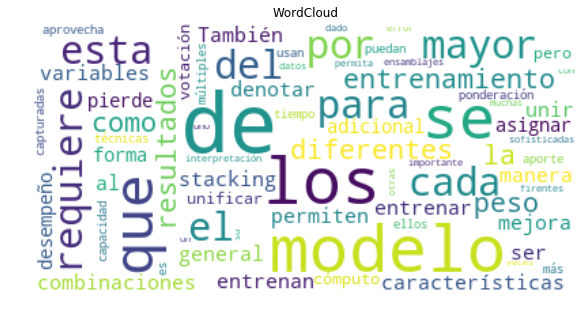

In [90]:
sample = data.loc[18,'T4']
wordcloud = WordCloud(max_font_size=60, background_color="white").generate(sample)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud')
plt.show()

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
seed=42

In [92]:
data['Sexo'].value_counts()

H    34
M     8
Name: Sexo, dtype: int64

In [93]:
y = data['Sexo'].map({'M':0, 'H':1})

In [96]:
vect = CountVectorizer(max_features=4000, ngram_range=(1, 2), binary=True)
X_dtm = vect.fit_transform(data['text'])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.2, random_state=seed)

In [98]:
sm = SMOTE(random_state=seed)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [103]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred),'F1 Score: ', metrics.f1_score(y_test, y_pred))

('Accuracy: ', 0.8888888888888888, 'F1 Score: ', 0.9411764705882353)
